In [1]:
x = [0.84, 0.92, 1.00, 1.08, 1.16]
fx = [0.431711, 0.398519, 0.367879, 0.339596, 0.313486]
h = 0.08

In [2]:
# 1-a
ddf_084 = (fx[2] - 2*fx[1] + fx[0]) / h**2    # 전향 유한차분
ddf_100 = (fx[3] - 2*fx[2] + fx[1]) / h**2    # 중앙 유한차분
print(f'f\'\'(0.84) = {ddf_084}\nf\'\'(1)    = {ddf_100}')

f''(0.84) = 0.39874999999999977
f''(1)    = 0.36828124999999967


In [3]:
# 1-b
h1 = 0.16
h2 = 0.08

ddf1 = (fx[4] - 2*fx[2] + fx[0]) / h1**2    # + O(h1)
ddf2 = (fx[3] - 2*fx[2] + fx[1]) / h2**2    # + O(h2)

n = 2
Re = (2**n*ddf2 - ddf1)/(2**n-1)            # + O(h1**2)
print('Richardson extrapolation sol :', Re)

Richardson extrapolation sol : 0.3681380208333332


In [4]:
# 1-c
'''
f(x+2h) + f(x-2h) - f(x+h) - f(x-h) = 3*h**2*f''(x) + O(h**4)
=> ( f(x+2h) + f(x-2h) - f(x+h) - f(x-h) ) / 3*h**2 = f''(x)
'''
h = 0.08
ddf_1 = (fx[4] + fx[0] - fx[3] - fx[1]) / (3*h**2)
print('f\'\'(1) =',ddf_1)

f''(1) = 0.36885416666666543


In [5]:
# 1-d
from scipy.interpolate import CubicSpline

cs = CubicSpline(x,fx)
ddcs = cs.derivative(2)
print('f\'\'(1) =',ddcs(1))

f''(1) = 0.36785156250000695


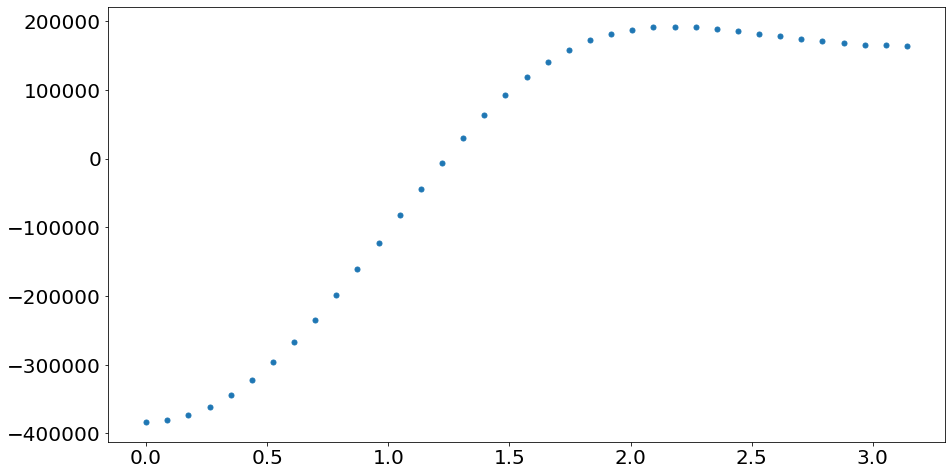

In [7]:
# 2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 20})

R = 1    # 1000mm = 1m
theta = np.arange(0,181,5)*np.pi/180
def x(theta):
    return R*(np.cos(theta) + np.sqrt(2.5**2 - np.sin(theta)**2))

rpm = 5000
rps = 5000/60
dtheta_dt = rps*2*np.pi

h = 5*np.pi/180
a = dtheta_dt**2*(x(theta + h) + x(theta - h) - 2*x(theta))/h**2
plt.plot(theta,a,'.',ms=10)
plt.show()

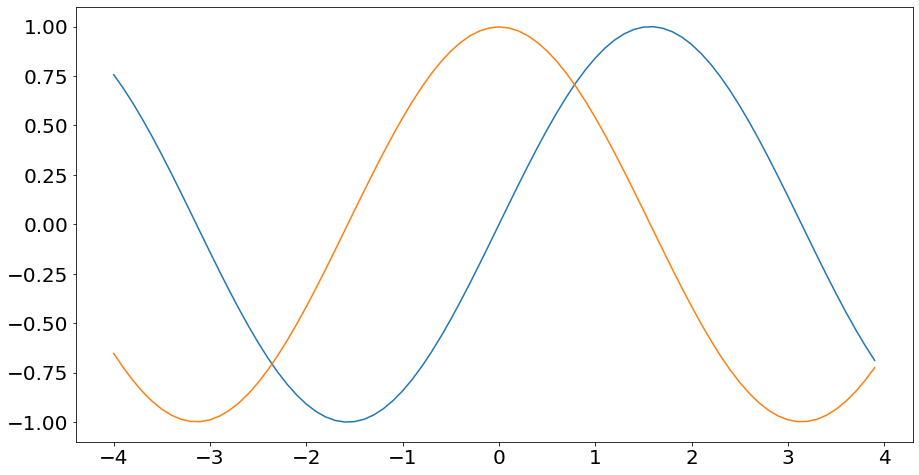

In [10]:
# 3-a
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(x)
dx = 0.1
df = lambda x: (f(x+dx)-f(x-dx))/(2*dx)
xx = np.arange(-4,4,0.1)
plt.plot(xx,f(xx))
plt.plot(xx,df(xx))
plt.show()

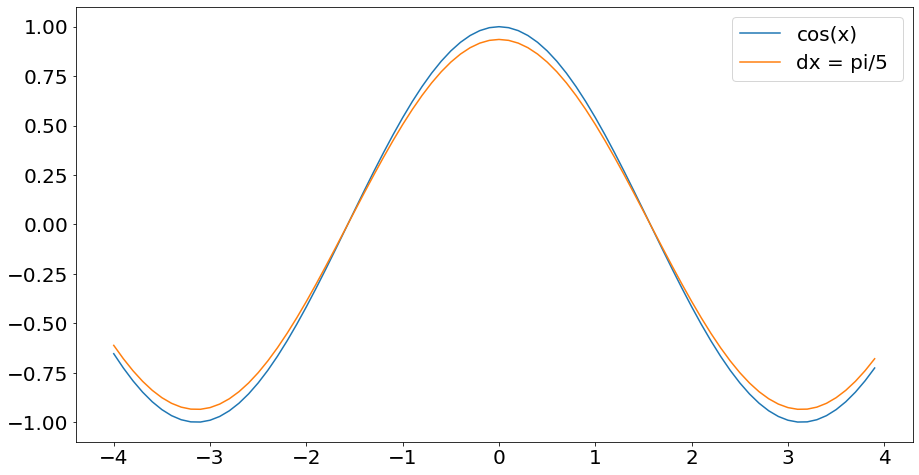

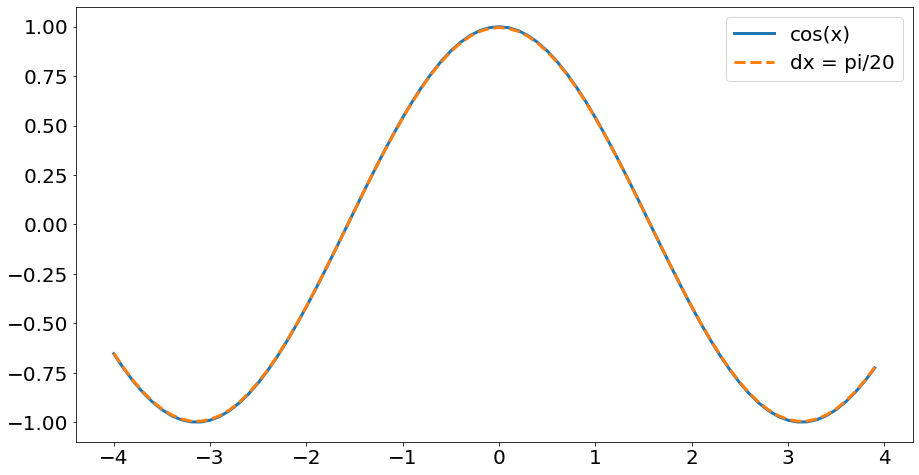

In [9]:
# 3-b
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(x)
cf = lambda x: np.cos(x)
dx1 = np.pi/5
dx2 = np.pi/20
df1 = lambda x: (f(x+dx1)-f(x-dx1))/(2*dx1)
df2 = lambda x: (f(x+dx2)-f(x-dx2))/(2*dx2)

xx = np.arange(-4,4,0.1)
plt.plot(xx,cf(xx),label='cos(x)')
plt.plot(xx,df1(xx),label='dx = pi/5 ')
plt.legend()
plt.show()
plt.plot(xx,cf(xx),label='cos(x)',lw=3)
plt.plot(xx,df2(xx),'--',label='dx = pi/20',lw=3)
plt.legend()
plt.show()